In [1]:
#PDF to text
from PyPDF2 import PdfReader

#general
import pandas as pd
import re

#NER
import torch
from transformers import BertTokenizer, BertForTokenClassification
from transformers import pipeline

In [2]:
FCReport = PdfReader("FC_AnnualReports/FrieslandCampina-Annual-Report-2021.pdf")

In [15]:
page1 = FCReport.pages[42]
page2 = FCReport.pages[43]

In [19]:
# #Removes headers and footers
# parts = []

# def visitor_body(text, cm, tm, fontDict, fontSize):
#     y = tm[5]
#     if y > 10 and y < 500:
#         parts.append(text)


text1=page1.extract_text()
text2=page2.extract_text()
# text_body = "".join(parts)

print(text1)

2021 Annual Report Royal FrieslandCampina N.V. | 43
Partnerships with customersCooperating to create a positive impact forms part of our culture. We refer to this  as cooperative sustainability. For us, this means close cooperation with stakeholders, including customers, to achieve sustainable developments at farms and make products sustainable. In 2021, we invested with customers in accelerating the reduction of greenhouse gases and promoting sustainable developments at the farms of our member dairy farmers. Supplying ingredients and products with a lower carbon footprint to our customers is an example of this. With these partnerships,  we not only contribute to lowering own carbon footprint, but we also support our customers by enabling them to offer products with a lower footprint under  their brands.In addition, we also carried out pilot projects for feed additives to reduce the emission of greenhouse gases, including the partnership with Barry Callebaut,  Agolin and Agrifirm. ‘On 

In [20]:
print(text2)

Report by the Executive Board_Nourishing a better planet
Choices International 2019 to create the new FrieslandCampina Global Nutritional Standards Next Level. 73 percent of the product supply consists of 'basic nutritional products for daily consumption' and 27 percent consists of 'self-indulgent products for occasional consumption’ (on the basis of sales volume). The objective is a proportion of at least 70 percent basic nutrition and a maximum of 30 percent self-indulgent products.Access to nutritionFrieslandCampina aims to increase access to healthy food, in particular dairy products, specifically for less privileged consumers for whom this is not self-evident, for example due to lower income. Shortages of nutrients, such as iodine, vitamin A and iron, are a threat to the health of individuals, especially in these groups. We do this by offering products in our lower disposable income markets (such as Indonesia, Vietnam, the Philippines, Pakistan, Nigeria and the Ivory Coast) with a

In [5]:
# Load the pre-trained model and tokenizer
model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForTokenClassification.from_pretrained(model_name)

C:\Users\kacpe\anaconda3\envs\DSMasters\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
# Initialize the NER pipeline
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

In [21]:
ner_results1 = ner_pipeline(text1)
ner_results2 = ner_pipeline(text2)

In [22]:
ner_results1

[{'entity': 'I-ORG',
  'score': 0.64911723,
  'index': 5,
  'word': 'Royal',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.74621004,
  'index': 6,
  'word': 'Fr',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.532505,
  'index': 7,
  'word': '##ies',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.4695705,
  'index': 8,
  'word': '##land',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.95729196,
  'index': 9,
  'word': '##C',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.83755356,
  'index': 10,
  'word': '##amp',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.8451441,
  'index': 11,
  'word': '##ina',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.73322135,
  'index': 12,
  'word': 'N',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.37672237,
  'index': 14,
  'word': 'V',
  'start': None,
  'end': None},
 {'entity': 'I-PER',
 

In [23]:
ner_results2

[{'entity': 'I-ORG',
  'score': 0.8932924,
  'index': 4,
  'word': 'Executive',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.9912219,
  'index': 5,
  'word': 'Board',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.9901406,
  'index': 13,
  'word': 'Choice',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.98336697,
  'index': 14,
  'word': '##s',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.99328446,
  'index': 15,
  'word': 'International',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.43847668,
  'index': 21,
  'word': 'Fr',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.5508839,
  'index': 22,
  'word': '##ies',
  'start': None,
  'end': None},
 {'entity': 'I-LOC',
  'score': 0.49684277,
  'index': 23,
  'word': '##land',
  'start': None,
  'end': None},
 {'entity': 'I-ORG',
  'score': 0.9690063,
  'index': 24,
  'word': '##C',
  'start': None,
  'end': None},
 

In [34]:
def extract_entities(predicted_tokens):
    entities = [token_info["entity"] for token_info in predicted_tokens]
    return entities

def compare_texts(text1_entities, text2_entities):
    common_entities = set(text1_entities) & set(text2_entities)
    unique_text1_entities = set(text1_entities) - set(text2_entities)
    unique_text2_entities = set(text2_entities) - set(text1_entities)
    return common_entities, unique_text1_entities, unique_text2_entities

text1_entities = extract_entities(ner_results1)
text2_entities = extract_entities(ner_results2)

# Compare entities between the two texts
common_entities, unique_text1_entities, unique_text2_entities = compare_texts(text1_entities, text2_entities)

# Print comparison results
print("Common entities:", common_entities)
print("Unique entities in text 1:", unique_text1_entities)
print("Unique entities in text 2:", unique_text2_entities)

Common entities: {'I-ORG', 'I-MISC', 'I-LOC'}
Unique entities in text 1: {'I-PER'}
Unique entities in text 2: set()


In [52]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
from wordcloud import WordCloud

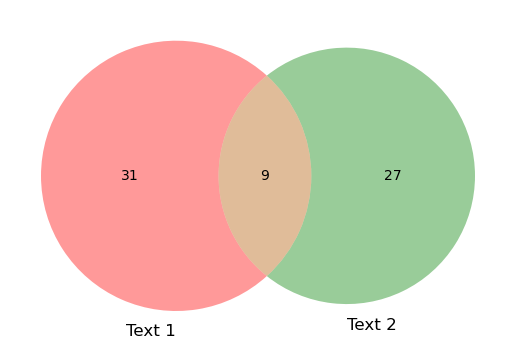

In [64]:
entities1 = set(entity['word'] for entity in ner_results1)
entities2 = set(entity['word'] for entity in ner_results2)
venn2([entities1, entities2], set_labels=('Text 1', 'Text 2'))

Text(0, 0.5, 'Entity Type')

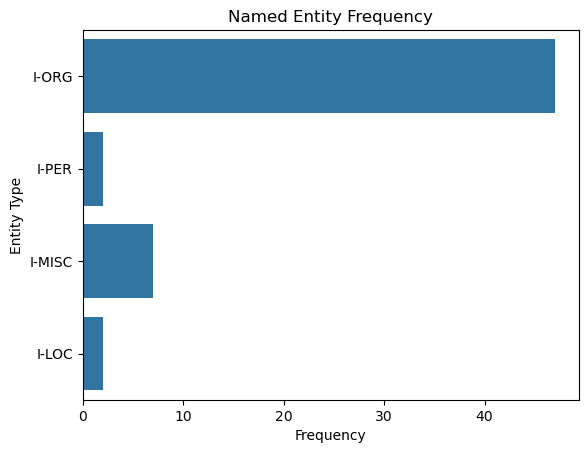

In [53]:
# 1. Named Entity Frequency Bar Chart
entities = [entity['entity'] for entity in ner_results]
sns.countplot(y=entities)
plt.title('Named Entity Frequency')
plt.xlabel('Frequency')
plt.ylabel('Entity Type')

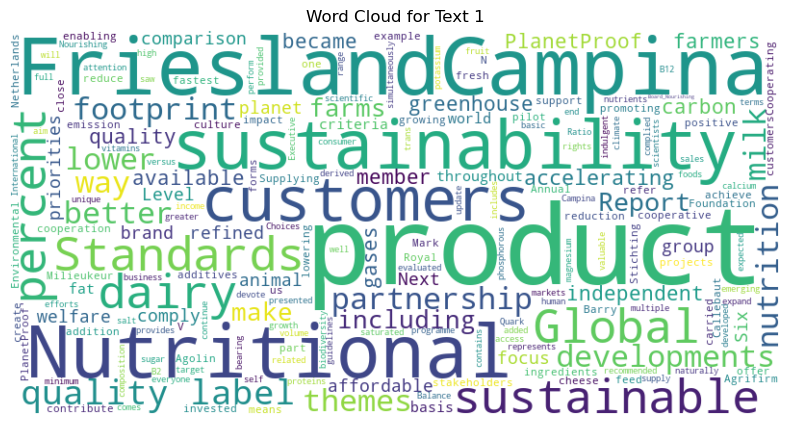

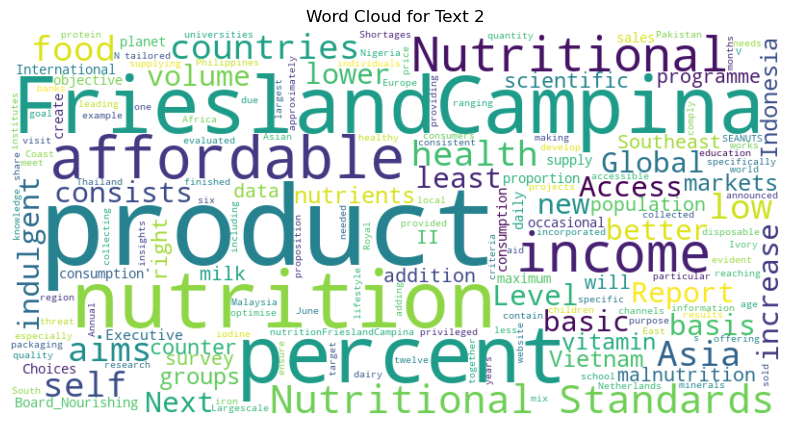

In [55]:
# Generate word cloud for text1
wordcloud_text1 = WordCloud(width=800, height=400, background_color='white').generate(text1)

# Generate word cloud for text2
wordcloud_text2 = WordCloud(width=800, height=400, background_color='white').generate(text2)

# Plot word cloud for text1
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_text1, interpolation='bilinear')
plt.title('Word Cloud for Text 1')
plt.axis('off')

# Plot word cloud for text2
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_text2, interpolation='bilinear')
plt.title('Word Cloud for Text 2')
plt.axis('off')

plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kacpe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


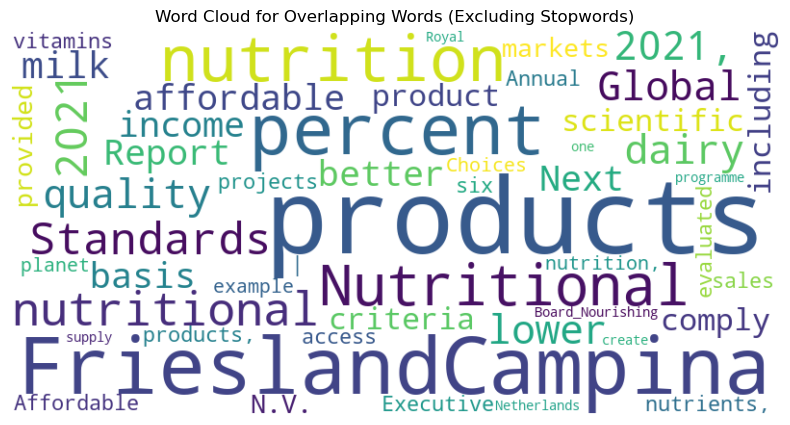

In [62]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Tokenize texts to get individual words
words_text1 = set(text1.split())
words_text2 = set(text2.split())

# Find the set intersection (overlap) of words
overlapping_words = words_text1.intersection(words_text2)

# Define a list of stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the overlapping words
filtered_words = [word for word in overlapping_words if word.lower() not in stop_words]

# Create frequency distribution of non-stopwords
word_freq = Counter()
for word in filtered_words:
    # Count occurrences of each word in both texts
    count_text1 = text1.split().count(word)
    count_text2 = text2.split().count(word)
    # Total count is the sum of occurrences in both texts
    total_count = count_text1 + count_text2
    # Add word and its frequency to the counter
    word_freq[word] = total_count

# Generate word cloud for non-stopwords
wordcloud_overlap = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_overlap, interpolation='bilinear')
plt.title('Word Cloud for Overlapping Words (Excluding Stopwords)')
plt.axis('off')
plt.show()

In [77]:
colors = {
    'I-PER': 'red',
    'I-ORG': 'blue',
    'I-LOC': 'green',
    'I-MISC': 'orange',
    # Add more tags as needed
}
highlighted_text = text1
for entity in ner_results:
    highlighted_text = highlighted_text.replace(entity['word'], f'<span style="color:{colors[entity["entity"]]}">{entity["word"]}</span>')
highlighted_text

'2021 <span style="color:blue"><span style="color:blue">A</span></span>nnual Report <span style="color:blue">Royal</span> <span style="color:blue"><span style="color:blue"><span style="color:blue">Fr</span></span></span>iesland<span style="color:blue">Camp</span>ina <span style="color:blue">N</span>.<span style="color:blue">V</span>. | 43\nPartnerships with customersCooperating to create a positive impact forms part of our culture. We refer to this  as cooperative sustainability. For us, this means close cooperation with stakeholders, including customers, to achieve sustainable developments at farms and make products sustainable. In 2021, we invested with customers in accelerating the reduction of greenhouse gases and promoting sustainable developments at the farms of our member dairy farmers. Supplying ingredients and products with a lower carbon footprint to our customers is an example of this. With these partnerships,  we not only contribute to lowering own carbon footprint, but we 

In [78]:
from IPython.display import display, HTML

display(HTML(highlighted_text))